<a href="https://colab.research.google.com/github/thuviettran/demo-github1/blob/main/B%E1%BA%A3n_sao_c%E1%BB%A7a_B%E1%BA%A3n_sao_c%E1%BB%A7a_cells.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/SHIDCenter/PathoNet.git
%cd PathoNet
!ls


Cloning into 'PathoNet'...
remote: Enumerating objects: 272, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 272 (delta 18), reused 13 (delta 13), pack-reused 246 (from 1)
Receiving objects: 100% (272/272), 3.18 MiB | 7.59 MiB/s, done.
Resolving deltas: 100% (149/149), done.
/content/PathoNet
config.py  doc		  models.py	    README.md
configs    evaluation.py  pipeline.py	    requirements.txt
data	   LICENSE	  preprocessing.py  train.py
demo.py    logs		  pretrainedmodels  utils.py


In [1]:
!pip install -U tensorflow


In [2]:
import tensorflow as tf
print(tf.__version__)


2.20.0


In [4]:
from model_tf2 import PathoNet

model = PathoNet(input_size=(256,256,3), classes=3)


Model: "PathoNet"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 256, 256,  │        432 │ input_layer[0][0] │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 256, 256,  │         64 │ conv2d[0][0]      │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu         │ (None, 256, 256,  │          0 │ batch_normalizat… │
│ (LeakyReLU)         │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 256, 256,  │      2,304 │ leaky_re_lu[0][0] │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 256, 256,  │         64 │ conv2d_1[0][0]    │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_1       │ (None, 256, 256,  │          0 │ batch_normalizat… │
│ (LeakyReLU)         │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 128, 128,  │          0 │ leaky_re_lu_1[0]… │
│ (MaxPooling2D)      │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 128, 128,  │      4,608 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 128, 128,  │      4,608 │ max_pooling2d[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        128 │ conv2d_2[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 128, 128,  │        128 │ conv2d_3[0][0]    │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_2       │ (None, 128, 128,  │          0 │ batch_normalizat… │
│ (LeakyReLU)         │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_3       │ (None, 128, 128,  │          0 │ batch_normalizat… │
│ (LeakyReLU)         │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 128, 128,  │          0 │ max_pooling2d[0]… │
│ (Concatenate)       │ 32)               │            │ max_pooling2d[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add (Add)           │ (None, 128, 128,  │          0 │ leaky_re_lu_2[0]… │
│                     │ 32)               │            │ leaky_re_lu_3[0]… │
│                     │                   │            │ concatenate[0][0] │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 1,247,659 (4.76 MB)

 Trainable params: 1,242,747 (4.74 MB)

 Non-trainable params: 4,912 (19.19 KB)

In [4]:
import numpy as np
import json
import tensorflow as tf


In [5]:
import os
import json
import numpy as np
import cv2
import tensorflow as tf


In [15]:
def gaussian_2d(shape, sigma, center):
    h, w = shape
    y, x = np.ogrid[:h, :w]
    cy, cx = center

    g = np.exp(-((x - cx)**2 + (y - cy)**2) / (2 * sigma**2))
    g /= np.sum(g)   # <-- normalize by sum, NOT by 2πσ²

    return g


In [16]:
import json

def json_to_density_map(json_path, img_shape=(256,256), num_classes=3, sigma=3):
    density = np.zeros((*img_shape, num_classes), dtype=np.float32)

    with open(json_path, "r") as f:
        points = json.load(f)

    for p in points:
        x = int(p["x"])
        y = int(p["y"])
        cls = int(p["label_id"]) - 1  # labels: 1,2,3 → channels: 0,1,2

        if 0 <= x < img_shape[1] and 0 <= y < img_shape[0]:
            density[:,:,cls] += gaussian_2d(
                img_shape,
                sigma=sigma,
                center=(y, x)
            )

    return density


In [8]:
import os

def build_file_list(root_dir):
    files = []
    for name in os.listdir(root_dir):
        if name.endswith(".jpg"):
            img_path = os.path.join(root_dir, name)
            json_path = os.path.join(
                root_dir, name.replace(".jpg", ".json")
            )
            if os.path.exists(json_path):
                files.append((img_path, json_path))
            else:
                print("Missing label for:", img_path)
    return files


In [7]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [6]:
def make_dataset(file_list, batch_size=4, shuffle=True):
    img_paths = [f[0] for f in file_list]
    json_paths = [f[1] for f in file_list]

    ds = tf.data.Dataset.from_tensor_slices((img_paths, json_paths))

    if shuffle:
        ds = ds.shuffle(buffer_size=len(file_list), reshuffle_each_iteration=True)

    ds = ds.map(tf_load_sample, num_parallel_calls=tf.data.AUTOTUNE)
    ds = ds.batch(batch_size)
    ds = ds.prefetch(tf.data.AUTOTUNE)

    return ds


In [13]:
train_files = build_file_list("/content/drive/MyDrive/256x256 cropped images/train256")
test_files  = build_file_list("/content/drive/MyDrive/256x256 cropped images/test256")

train_ds = make_dataset(train_files, batch_size=4)
test_ds  = make_dataset(test_files, batch_size=4, shuffle=False)


Missing label for: /content/drive/MyDrive/256x256 cropped images/train256/k-2765_0204_11 (1).jpg


In [14]:
print("Train samples:", len(train_files))
print("Test samples:", len(test_files))
print(train_files[0])


Train samples: 1656
Test samples: 700
('/content/drive/MyDrive/256x256 cropped images/train256/SC11475-17_0284_5.jpg', '/content/drive/MyDrive/256x256 cropped images/train256/SC11475-17_0284_5.json')


Image shape: (256, 256, 3)
Density shape: (256, 256, 3)
Counts: [0.9999984  1.9999971  0.99999887]


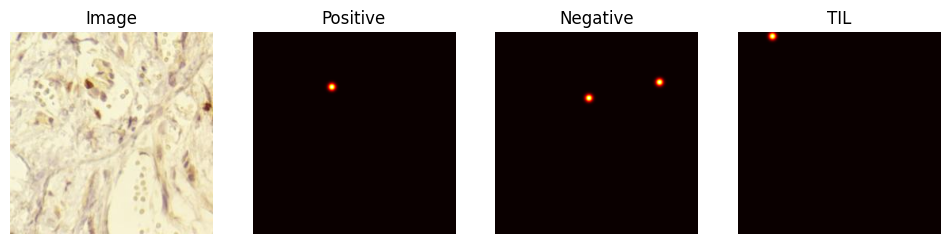

In [18]:
import matplotlib.pyplot as plt
from PIL import Image

img_path, json_path = train_files[0]

img = np.array(Image.open(img_path))
density = json_to_density_map(json_path)

print("Image shape:", img.shape)
print("Density shape:", density.shape)
print("Counts:", density.sum(axis=(0,1)))

plt.figure(figsize=(12,4))
plt.subplot(1,4,1)
plt.title("Image")
plt.imshow(img)
plt.axis("off")

for i, name in enumerate(["Positive", "Negative", "TIL"]):
    plt.subplot(1,4,i+2)
    plt.title(name)
    plt.imshow(density[:,:,i], cmap="hot")
    plt.axis("off")

plt.show()


In [12]:
import tensorflow as tf
from PIL import Image

IMG_SIZE = (256, 256)
NUM_CLASSES = 3

def load_sample(img_path, json_path):
    # Load image
    img = Image.open(img_path).convert("RGB")
    img = img.resize(IMG_SIZE)
    img = np.array(img, dtype=np.float32) / 255.0

    # Load density map
    density = json_to_density_map(
        json_path,
        img_shape=IMG_SIZE,
        num_classes=NUM_CLASSES,
        sigma=3
    )

    return img, density


In [10]:
def tf_load_sample(img_path, json_path):
    img, dens = tf.numpy_function(
        load_sample,
        [img_path, json_path],
        [tf.float32, tf.float32]
    )

    img.set_shape((256,256,3))
    dens.set_shape((256,256,3))
    return img, dens


In [19]:
BATCH_SIZE = 4

train_ds = make_dataset(train_files, BATCH_SIZE, shuffle=True)
test_ds  = make_dataset(test_files,  BATCH_SIZE, shuffle=False)


In [21]:
for x, y in train_ds.take(1):
    print(x.shape, y.shape)
    print("Counts:", tf.reduce_sum(y, axis=[1,2]))


(4, 256, 256, 3) (4, 256, 256, 3)
Counts: tf.Tensor(
[[ 20.  31.   2.]
 [ 54.  43.   0.]
 [  6.  14.   0.]
 [ 35. 158.   0.]], shape=(4, 3), dtype=float32)


In [22]:
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        monitor="val_loss",
        patience=8,
        restore_best_weights=True,
        verbose=1
    ),
    tf.keras.callbacks.ModelCheckpoint(
        filepath="/content/pathonet_best.keras",
        monitor="val_loss",
        save_best_only=True,
        verbose=1
    )
]


In [ ]:
model = PathoNet(input_size=(256,256,3), classes=3)

model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
    loss="mse"
)

history = model.fit(
    train_ds,
    validation_data=test_ds,
    epochs=50,
    callbacks=callbacks
)


279/414 ━━━━━━━━━━━━━━━━━━━━ 38s 282ms/step - loss: 0.0011

In [ ]:
import os
os.path.exists("/content/pathonet_best.keras")


False

In [ ]:
model = tf.keras.models.load_model(
    "/content/pathonet_best.keras",
    compile=False
)


In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-4),
    loss="mse"
)


In [ ]:
import numpy as np

pred_counts = []
gt_counts = []

for x, y in test_ds:
    preds = model.predict(x, verbose=0)

    pred_counts.append(np.sum(preds, axis=(1,2)))
    gt_counts.append(np.sum(y.numpy(), axis=(1,2)))

pred_counts = np.concatenate(pred_counts, axis=0)
gt_counts   = np.concatenate(gt_counts, axis=0)

mae_per_class = np.mean(np.abs(pred_counts - gt_counts), axis=0)
total_mae = np.mean(np.abs(np.sum(pred_counts, axis=1) -
                           np.sum(gt_counts, axis=1)))

print("MAE per class:", mae_per_class)
print("Total MAE:", total_mae)


MAE per class: [22.2254    46.134377   1.9505106]
Total MAE: 70.31028


In [ ]:
# mode need cải tiến

In [ ]:
avg_gt = np.mean(np.sum(gt_counts, axis=1))
print("Average GT total count per patch:", avg_gt)


Average GT total count per patch: 70.31029
